In [32]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl

In [33]:
mpl.rc('font',family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

In [24]:
import cv2
from skimage.data import horse

img_raw = horse().astype('uint8')
img_raw = np.ones(img_raw.shape) - img_raw

img = img_raw.copy().astype('uint8')

contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

In [25]:
len(contours)

2

In [26]:
contours[0].shape

(312, 1, 2)

In [27]:
np.squeeze(contours[0])[:5]

array([[350,   9],
       [346,  13],
       [345,  13],
       [339,  19],
       [330,  20]], dtype=int32)

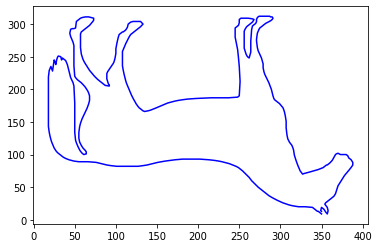

In [29]:
x0, y0 = zip(*np.squeeze(contours[0]))
plt.plot(x0, y0, c='b')
plt.show()

In [30]:
hierachy

array([[[-1, -1,  1, -1],
        [-1, -1, -1,  0]]], dtype=int32)

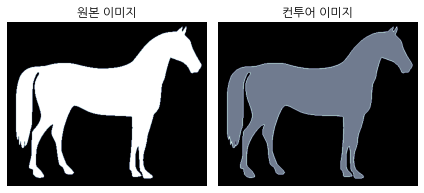

In [34]:
image = cv2.drawContours(img, contours, 0, 2)

plt.subplot(1, 2, 1)
plt.imshow(img_raw, cmap= 'bone')
plt.title('원본 이미지')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap = 'bone')
plt.title('컨투어 이미지')
plt.axis('off')
plt.tight_layout()
plt.show()

## 이미지 모멘트

In [35]:
c0 = contours[0]
M = cv2.moments(c0)
M

{'m00': 42355.0,
 'm10': 7943000.166666666,
 'm01': 6115675.833333333,
 'm20': 1914995009.1666665,
 'm11': 1043128904.8333333,
 'm02': 1041817606.0,
 'm30': 517465951777.85004,
 'm21': 233874687443.69998,
 'm12': 169430720481.3,
 'm03': 200904428563.85,
 'mu20': 425412866.6175771,
 'mu11': -103767899.87557864,
 'mu02': 158769774.61250484,
 'mu30': -1219318387.8395386,
 'mu21': -3713125246.697487,
 'mu12': 4020833974.2852783,
 'mu03': 4625649126.278534,
 'nu20': 0.2371380524771235,
 'nu11': -0.0578433790256196,
 'nu02': 0.08850309451896964,
 'nu30': -0.003302595676372647,
 'nu21': -0.010057218449154588,
 'nu12': 0.010890665663146169,
 'nu03': 0.012528843128440374}

In [36]:
cv2.contourArea(c0)

42355.0

In [37]:
cv2.arcLength(c0, closed = True), cv2.arcLength(c0, closed = False)

(2203.678272008896, 2199.678272008896)

In [38]:
x, y, w, h = cv2.boundingRect(c0)
x, y, w, h

(18, 9, 371, 304)

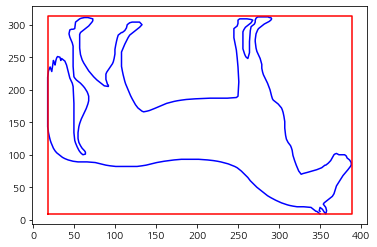

In [44]:
plt.plot(x0, y0, c = 'b')
plt.plot(
        [x, x + w, x + w, x, x],
        [y, y, y +h, y + h, y],
        c = 'r')

plt.show()

In [45]:
aspect_ratio = float(w) / h
aspect_ratio

1.2203947368421053

<function matplotlib.pyplot.show(close=None, block=None)>

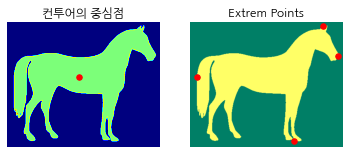

In [54]:
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])

plt.subplot(1, 2, 1)
plt.imshow(image, cmap = 'jet' )
plt.title('컨투어의 중심점')
plt.axis('off')
plt.scatter([cx], [cy], c='r', s=30)

plt.subplot(1, 2, 2)
plt.imshow(img_raw, cmap='summer')
plt.axis('off')
plt.scatter(
    [leftmost[0], rightmost[0], topmost[0], bottommost[0]],
    [leftmost[1], rightmost[1], topmost[1], bottommost[1]],
    c = 'r', s= 30)
plt.title('Extrem Points')

plt.show

## 컨투어 추정

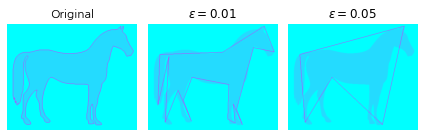

In [61]:
img1 = img_raw.copy().astype('uint8')
img2 = img_raw.copy().astype('uint8')
img3 = img_raw.copy().astype('uint8')

c0 = contours[0]

epsilon1 = 0.01*cv2.arcLength(c0, True)    #외곽선 함수
epsilon2 = 0.05*cv2.arcLength(c0, True)

approx1 = cv2.approxPolyDP(c0, epsilon1, True)
approx2 = cv2.approxPolyDP(c0, epsilon2, True)

image1 = cv2.drawContours(img1, [c0], -1, 7)  
image2 = cv2.drawContours(img2, [approx1], -1, 7)
image3 = cv2.drawContours(img3, [approx2], -1, 7)


titles = ['Original', '$\epsilon=0.01$', '$\epsilon=0.05$']
images = [image1, image2, image3]

for i in range(3):
    plt.subplot(1, 3, i +1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap = 'cool')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

## Convex Hull

In [62]:
cv2.isContourConvex(c0)

False

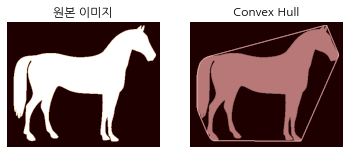

In [66]:
img4 = img_raw.copy().astype('uint8')

c0 = contours[0]
hull = cv2.convexHull(c0)
image4 = cv2.drawContours(img4, [hull], 0, 3)
titles = ['원본 이미지', 'Convex Hull']
images = [ img_raw, img4]

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.title(titles[i])
    plt.imshow(images[i], 'pink')
    plt.axis('off')
    
plt.show()

## Bounding Rectangle

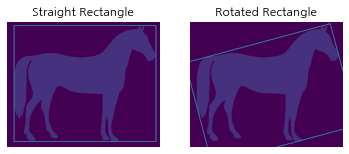

In [70]:
img1 = img_raw.copy().astype("uint8")
img2 = img_raw.copy().astype("uint8")

# Straight Rectangle
x, y, w, h = cv2.boundingRect(c0)
img1 = cv2.rectangle(img1, (x, y), (x+w, y+h), 7)

# Rotated Rectangle
rect = cv2.minAreaRect(c0)
box = cv2.boxPoints(rect)
box = box.astype('int')
img2 = cv2.drawContours(img2, [box], -1, 7) # blue

plt.subplot(1,2,1)
plt.imshow(img1, cmap="viridis")
plt.axis('off')
plt.title("Straight Rectangle")
plt.subplot(1,2,2)
plt.imshow(img2, cmap="viridis")
plt.axis('off')
plt.title("Rotated Rectangle")
plt.show()

## Minumum Enclosing Circle 과 Fitting Ellipse

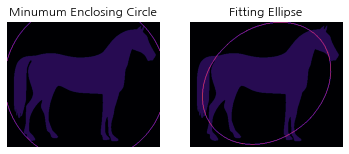

In [77]:
img3 = img_raw.copy().astype("uint8")
img4 = img_raw.copy().astype("uint8")

(x, y), radius = cv2.minEnclosingCircle(c0)
center = int(x), int(y)
radius = int(radius)
img3 = cv2.circle(img3, center, radius, 7)

ellipse = cv2.fitEllipse(c0)
img4 = cv2.ellipse(img4, ellipse, 7)


plt.subplot(1,2,1)
plt.imshow(img3, cmap="inferno")
plt.axis('off')
plt.title("Minumum Enclosing Circle")
plt.subplot(1,2,2)
plt.imshow(img4, cmap="inferno")
plt.axis('off')
plt.title("Fitting Ellipse")
plt.show()
